In [30]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 11)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-05,116.860001,115.809998,115.919998,116.610001,22193600.0,111.727715
2017-01-06,118.160004,116.470001,116.779999,117.910004,31751900.0,112.973305
2017-01-09,119.430000,117.940002,117.949997,118.989998,33561900.0,114.008080
2017-01-10,119.379997,118.300003,118.769997,119.110001,24462100.0,114.123047
2017-01-11,119.930000,118.599998,118.739998,119.750000,27588600.0,114.736275


In [2]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

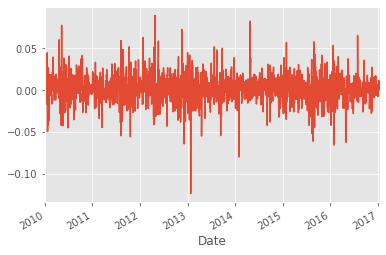

In [4]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [5]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']

In [6]:
dfcomp.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2017-01-05,111.727715,27.911093,794.020020,150.013260,59.230362
2017-01-06,112.973305,27.990791,806.150024,150.751312,59.743763
2017-01-09,114.008080,27.857965,806.650024,149.079559,59.553616
2017-01-10,114.123047,27.778269,804.789978,147.185501,59.534603
2017-01-11,114.736275,27.866817,807.909973,149.168472,60.076519


In [7]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()

Text(0, 0.5, 'Returns GE')

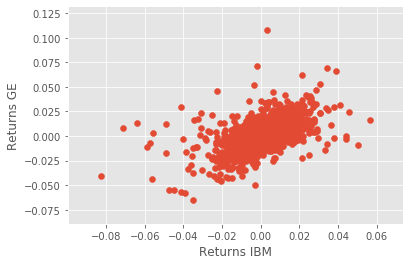

In [12]:
plt.scatter(retscomp.IBM, retscomp.GE)
plt.xlabel('Returns IBM') 
plt.ylabel('Returns GE')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8879b29940>,
      dtype=object)

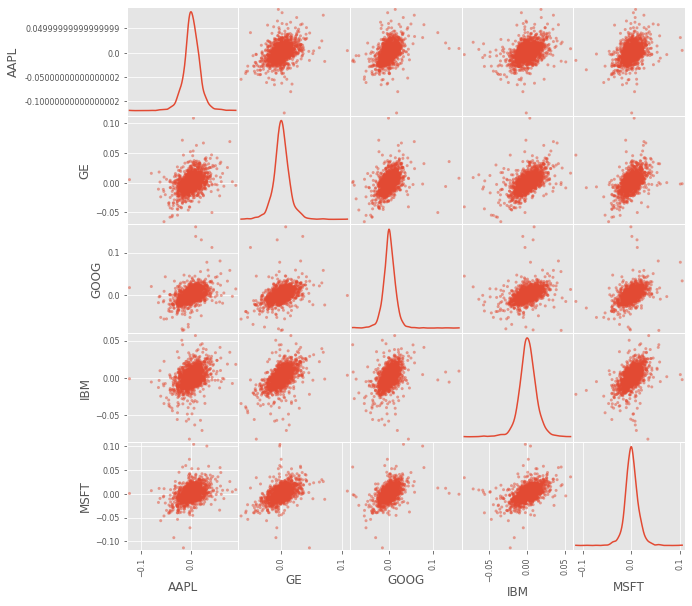

In [14]:
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10))

([<matplotlib.axis.YTick at 0x7f8877a7cfd0>,
 <a list of 5 Text yticklabel objects>)

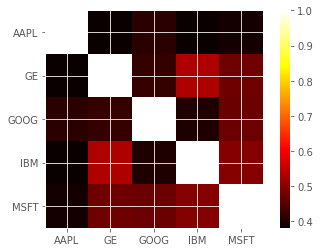

In [15]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

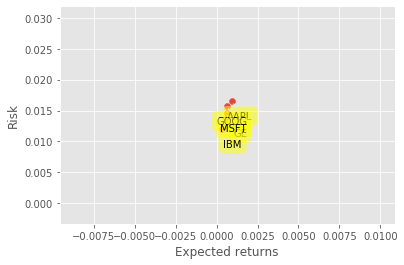

In [16]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [20]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2017-01-05,111.727715,22193600.0,0.900440,0.595240
2017-01-06,112.973305,31751900.0,1.433299,0.967636
2017-01-09,114.008080,33561900.0,1.252204,0.881730
2017-01-10,114.123047,24462100.0,0.906720,0.286271
2017-01-11,114.736275,27588600.0,1.110649,0.850600


In [25]:
import math
import numpy as np
import sklearn
from sklearn.preprocessing import scale
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = sklearn.preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# Linear regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train,y_train)

NameError: name 'train_test_split' is not defined